In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline
#%pylab inline

from pylab import *

# load statsmodels
import statsmodels.api as sm

import itertools

from sklearn import metrics

import random
import scipy
import six
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import gc
import json
import re

# use seaborn plotting defaults
import sys
sys.path.append('/Users/tatiana/anaconda/pkgs/seaborn-0.6.0-np110py34_0/lib/python3.4/site-packages')
import seaborn as sns; sns.set()

In [78]:
import scipy as sc
import pylab as pl


In [96]:
columns = ['KNN', 'LR', 'SVM','NB']
index = ['one','two','three','four','five']

precision = pd.DataFrame(columns=columns, index = index)
precision['KNN'] = [0.34,0.22,0.29,0.37,0.41]
precision['LR'] = [0.61,0.42,0.48,0.49,0.61]
precision['NB'] = [0.54,0.38,0.45,0.51,0.63]
precision['SVM'] = [0.58,0.39,0.47,0.50,0.63]
precision['blended_freq'] = [0.61,0.42,0.48,0.50,0.62]
precision['blended_ave_rnd'] = [0.8,0.42,0.49,0.52,0.73]
precision['p_r'] = 'precision'

recall = pd.DataFrame(columns=columns, index = index)
recall['KNN'] = [0.28,0.04,0.08,0.33,0.71]
recall['LR'] = [0.60,0.25,0.31,0.53,0.74]
recall['NB'] = [0.63,0.28,0.38,0.48,0.73]
recall['SVM'] = [0.6,0.29,0.32,0.54,0.71]
recall['blended_freq'] = [0.62,0.28,0.33,0.53,0.74]
recall['blended_ave_rnd'] = [0.55,0.43,0.36,0.64,0.72]
recall['p_r'] = 'recall'

In [97]:
precision

,KNN,LR,SVM,NB,blended_freq,blended_ave_rnd,p_r
one,0.34,0.61,0.58,0.54,0.61,0.80,precision
two,0.22,0.42,0.39,0.38,0.42,0.42,precision
three,0.29,0.48,0.47,0.45,0.48,0.49,precision
four,0.37,0.49,0.50,0.51,0.50,0.52,precision
five,0.41,0.61,0.63,0.63,0.62,0.73,precision


In [98]:
recall

,KNN,LR,SVM,NB,blended_freq,blended_ave_rnd,p_r
one,0.28,0.60,0.60,0.63,0.62,0.55,recall
two,0.04,0.25,0.29,0.28,0.28,0.43,recall
three,0.08,0.31,0.32,0.38,0.33,0.36,recall
four,0.33,0.53,0.54,0.48,0.53,0.64,recall
five,0.71,0.74,0.71,0.73,0.74,0.72,recall


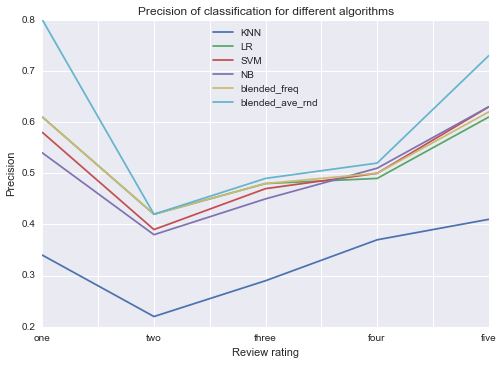

In [88]:
plt.figure(); 
precision.plot(); 
plt.ylabel('Precision')
plt.xlabel('Review rating')
plt.title('Precision of classification for different algorithms')
plt.legend(loc='best')

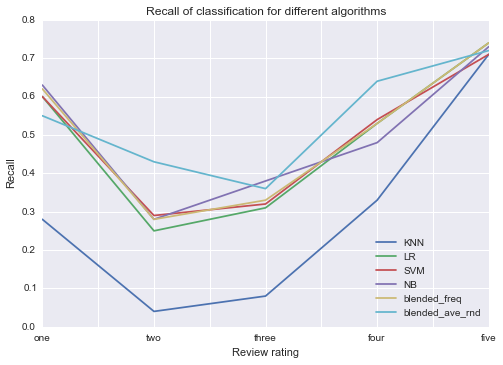

In [92]:
plt.figure(); 
recall.plot();
plt.ylabel('Recall')
plt.xlabel('Review rating')
plt.title('Recall of classification for different algorithms')
plt.legend(loc='best')

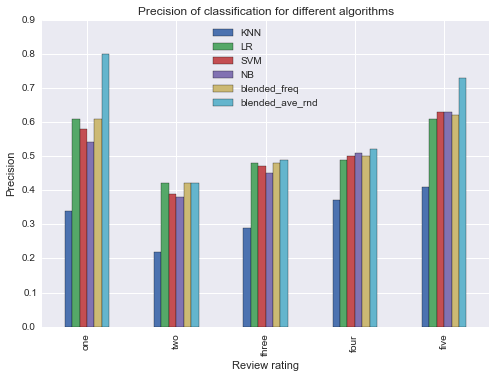

In [91]:
plt.figure(); 
precision.plot(kind='bar'); 
plt.ylabel('Precision')
plt.xlabel('Review rating')
plt.title('Precision of classification for different algorithms')
plt.legend(loc='best')

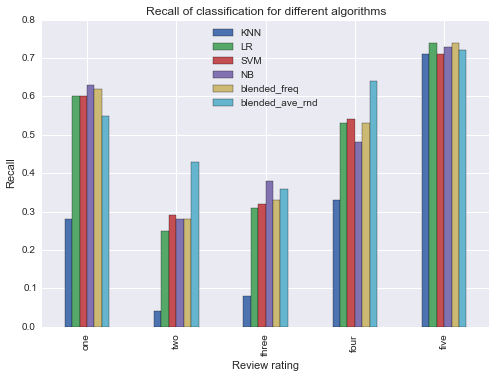

In [93]:
plt.figure(); 
recall.plot(kind = 'bar');
plt.ylabel('Recall')
plt.xlabel('Review rating')
plt.title('Recall of classification for different algorithms')
plt.legend(loc='best')

In [107]:
df = precision.append(recall)
df

,KNN,LR,SVM,NB,blended_freq,blended_ave_rnd,p_r
one,0.34,0.61,0.58,0.54,0.61,0.80,precision
two,0.22,0.42,0.39,0.38,0.42,0.42,precision
three,0.29,0.48,0.47,0.45,0.48,0.49,precision
four,0.37,0.49,0.50,0.51,0.50,0.52,precision
five,0.41,0.61,0.63,0.63,0.62,0.73,precision
one,0.28,0.60,0.60,0.63,0.62,0.55,recall
two,0.04,0.25,0.29,0.28,0.28,0.43,recall
three,0.08,0.31,0.32,0.38,0.33,0.36,recall
four,0.33,0.53,0.54,0.48,0.53,0.64,recall
five,0.71,0.74,0.71,0.73,0.74,0.72,recall


In [110]:
df['star'] = ['one','two','three','four','five','one','two','three','four','five']

In [114]:
df.head()

,KNN,LR,SVM,NB,blended_freq,blended_ave_rnd,p_r,star
one,0.34,0.61,0.58,0.54,0.61,0.80,precision,one
two,0.22,0.42,0.39,0.38,0.42,0.42,precision,two
three,0.29,0.48,0.47,0.45,0.48,0.49,precision,three
four,0.37,0.49,0.50,0.51,0.50,0.52,precision,four
five,0.41,0.61,0.63,0.63,0.62,0.73,precision,five


In [113]:
df.groupby('star')